# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns # importar librerías

In [4]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')#completa el código
usage = pd.read_csv('/datasets/usage.csv')#completa el código

In [5]:
plans.head(5)# mostrar las primeras 5 filas de plans

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [6]:
users.head(5)# mostrar las primeras 5 filas de users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [7]:
usage.head(5)# mostrar las primeras 5 filas de usage

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [8]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [9]:
plans.info()# inspección de plans con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [10]:
users.info()# inspección de users con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [11]:
usage.info()# inspección de usage con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [12]:
# cantidad de nulos para users
print(users.isna().sum())# Cantidad de valores nulos)
print(users.isna().mean().sort_values(ascending=False))# Proporción de valores nulos)

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
churn_date    0.88350
city          0.11725
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
reg_date      0.00000
plan          0.00000
dtype: float64


In [13]:
usage.isna().sum()# cantidad de nulos para usage

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64

✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?
Las columnas con valores faltantes son: City con 11% y churn_date con un 88%. 
- Indica qué harías: ¿imputar, eliminar, ignorar?
En el caso de City imputar para asi poder realizar un analisis 100% correcto de la demografia de los usuarios y con esto mejores estrategias por pais. 
Para el caso de churn_date ignorar, ya que es valor faltante indica que el cliente aun esta activo.

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [14]:
users[['user_id','age']].describe()# explorar columnas numéricas de users

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` tiene datos coherentes considerando id de usarios desde el 10000 hasta el 13999. 
- La columna `age` tiene datos atipicos y claramente errados como -999. Hay que investigar y limpiar para poder analizar.

In [15]:
usage[['id','user_id']].describe()# explorar columnas numéricas de usage

,id,user_id
count,40000.00000,40000.000000
mean,20000.50000,12002.405975
std,11547.14972,1157.279564
min,1.00000,10000.000000
25%,10000.75000,10996.000000
50%,20000.50000,12013.000000
75%,30000.25000,13005.000000
max,40000.00000,13999.000000


- Las columnas id y user_id tienen datos correctos y normalmente distribuidos.
- Las columnas no requieren investigacion o limpieza.

In [16]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
users[columnas_user].describe()

,city,plan
count,3531,4000
unique,7,2
top,Bogotá,Basico
freq,808,2595


- La columna `city` indica que dentro del data hay 7 ciudades y que Bogota es la mas frecuente con 808 registros.  
- La columna `plan` señala que solo hay 2 planes disponibles, y que el predominante es el de tipo Basico con 2595 registros.

In [17]:
# explorar columna categórica de usage
usage['type'].describe() # completa el código

count     40000
unique        2
top        text
freq      22092
Name: type, dtype: object

- La columna `type`  muestra que hay 2 tipos de servicio dentro del data, que predomina el de tipo texto con 22092 registros de los 40000. 


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?
Columna age tiene sentinels -999. 
- ¿Qué acción tomarías?
Reemplazar por Nan.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [18]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'],errors='coerce')# completa el código

In [19]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'],errors='coerce')# completa el código

In [20]:
users['reg_date'].dt.year.value_counts()# Revisar los años presentes en `reg_date` de users


2024    1330
2023    1316
2022    1314
2026      40
Name: reg_date, dtype: int64

En `reg_date`, hay registros para el año 2026, lo cual no corresponde, ya que la data es solo hasta 2024.

In [21]:
usage['date'].dt.year.value_counts()# Revisar los años presentes en `date` de usage


2024.0    39950
Name: date, dtype: int64

En `date`, en usage tiene datos solo del uso de servicios para el año 2024.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
Dentro del data users hay registros para el año 2026, lo cual no deberia de aplicarse, ya que el analisis y datas presentadas solo son hasta 2024. 
- ¿Qué harías con ellas?
Eliminarla, ya que no aplica analizar.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [22]:
# Reemplazar -999 por la mediana de age
age_mediana = users['age'].median()
users['age'] = users['age'].replace(-999,pd.NA).fillna(age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [23]:
users['city']=users['city'].replace('?','NA')# Reemplazar ? por NA en city
users['city'].value_counts()# Verificar cambios


Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
NA           96
Name: city, dtype: int64

In [24]:
users.loc[users['reg_date'].dt.year==2026,'reg_date']=pd.NaT # Marcar fechas futuras como NA para reg_date
users['reg_date'].value_counts()# Verificar cambios


2024-06-27 06:08:22.325581392    1
2023-03-31 06:21:20.120030008    1
2024-06-20 09:50:54.463615904    1
2022-05-22 00:23:45.956489122    1
2022-04-23 06:22:24.936234060    1
                                ..
2022-07-29 04:44:06.661665416    1
2022-02-22 00:36:43.750937734    1
2022-10-31 09:22:49.242310580    1
2022-09-24 16:46:48.702175544    1
2022-03-28 12:38:20.975243811    1
Name: reg_date, Length: 3960, dtype: int64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [25]:
usage['duration'].isna().groupby(usage['type']).mean().sort_values(ascending=False)# Verificación MAR en usage (Missing At Random) para duration


type
text    0.999276
call    0.000000
Name: duration, dtype: float64

In [26]:
usage['length'].isna().groupby(usage['type']).mean().sort_values(ascending=False)# Verificación MAR en usage (Missing At Random) para length


type
call    0.99933
text    0.00000
Name: length, dtype: float64

Los nulos en `duration` y `length` no son MAR son MNAR, es decir estan asi por estructura. La falta de dato esta relacionada con el tipo de servicio, las llamadas no tienen 'length', asi como los mensajes no tienen 'duration'.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [27]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas
usage["call_minutes"] = usage["duration"].where(usage["type"] == "call", 0)
# Agrupar información por usuario
usage_agg = (usage.groupby("user_id").agg(
        total_texts=("is_text", "sum"),
        total_calls=("is_call", "sum"),
        total_call_minutes=("call_minutes", "sum")
    )
    .reset_index()
)

# observar resultado
usage_agg.head(3)

,user_id,total_texts,total_calls,total_call_minutes
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [45]:
# Renombrar columnas

usage_agg=usage_agg.rename(columns={'total_texts':'cant_mensajes','total_calls':'cant_llamadas','total_call_minutes':'cant_minutos_llamada'})
# observar resultado

usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [46]:

# Combinar la tabla agregada con el dataset de usuarios
user_profile = (users.merge(usage_agg,on="user_id",how="left"))

user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,NA,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [30]:
users.describe()# Resumen estadístico de las columnas numéricas


,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,48.122250
std,1154.844867,17.690408
min,10000.000000,18.000000
25%,10999.750000,33.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


In [31]:
users['plan'].value_counts(normalize=True)*100# Distribución porcentual del tipo de plan


Basico     64.875
Premium    35.125
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

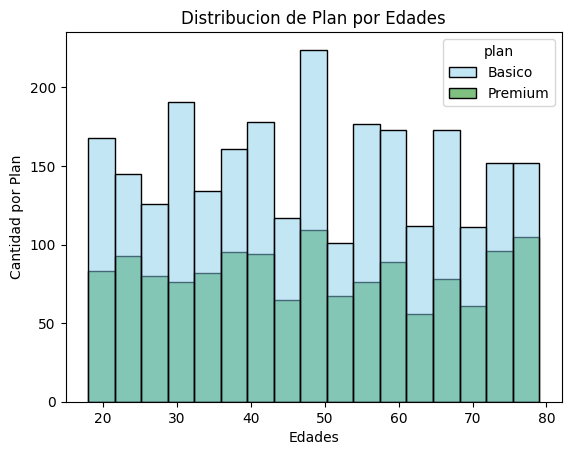

In [32]:
# Histograma para visualizar la edad (age)
sns.histplot(data=users,x='age',hue='plan',palette=['skyblue','green'])
plt.title('Distribucion de Plan por Edades')
plt.xticks()
plt.xlabel('Edades')
plt.ylabel('Cantidad por Plan')
plt.show()

💡Insights: 
- Al revisasr la distribucion por Plan se aprecia que en la gran mayoria de los grupos etareos predomina el plan de tipo Premium como en usuarios sobre los 70 años o entre los 20 y 30 años.

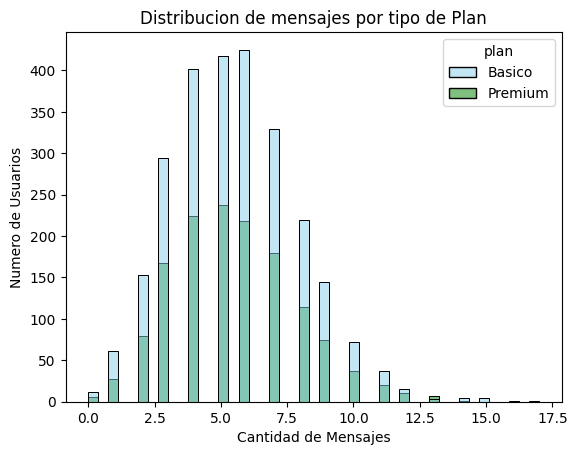

In [33]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile,x='cant_mensajes',hue='plan',palette=['skyblue','green'])
plt.title('Distribucion de mensajes por tipo de Plan')
plt.xticks()
plt.xlabel('Cantidad de Mensajes')
plt.ylabel('Numero de Usuarios')
plt.show()


💡Insights: 
- Mas de 400 usuarios envían no mas de 7.5 mensajes, lo cual es bastante bajo, puede indicar que usan apps independientes para comunicacion de tipo escrita, y no lo que incluye el plan, ya que no hay gran diferencia en si el usuario es Basico o Premium.

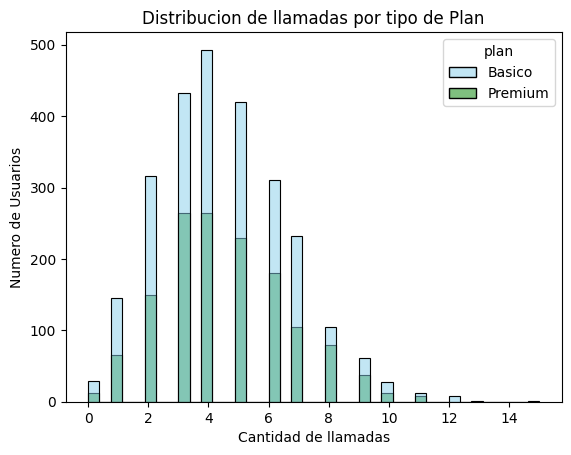

In [34]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile,x='cant_llamadas',hue='plan',palette=['skyblue','green'])
plt.title('Distribucion de llamadas por tipo de Plan')
plt.xticks()
plt.xlabel('Cantidad de llamadas')
plt.ylabel('Numero de Usuarios')
plt.show()

💡Insights: 
- No mas de 100 usuarios realizan mas de 8 llamadas, lo que sugiere que el servicio aun siendo bien pagado, no se utiliza lo suficiente.
- No se ve un gran patron diferencial, es decir, de 500 usuarios que hicieron 4 llamadas 250 eran de plan Basico y 250 de Premium. 

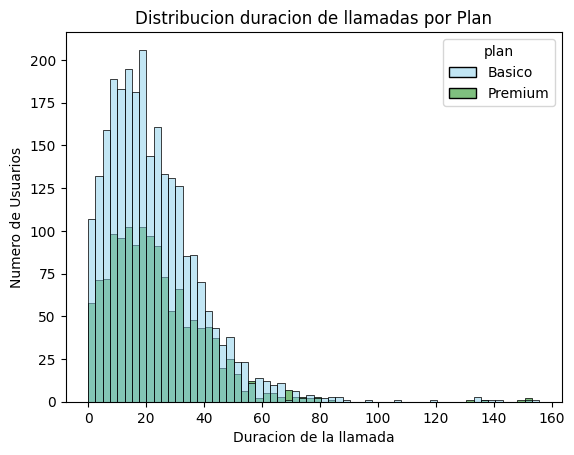

In [47]:
# Histograma para visualizar la cant_minutos_llamada

sns.histplot(data=user_profile,x='cant_minutos_llamada',hue='plan',palette=['skyblue','green'])
plt.title('Distribucion duracion de llamadas por Plan')
plt.xticks()
plt.xlabel('Duracion de la llamada')
plt.ylabel('Numero de Usuarios')
plt.show()


💡Insights: 
- La distribucion de la duracion de las llamadas muestra un claro sesgo a la derecha, lo que indica que la media de duracion de las llamadas es baja, entre 0 y 40 segundos.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

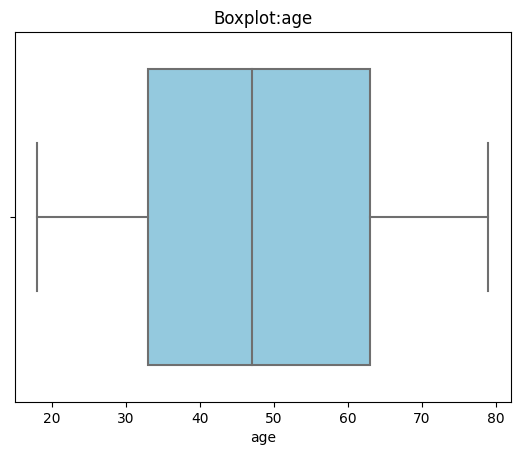

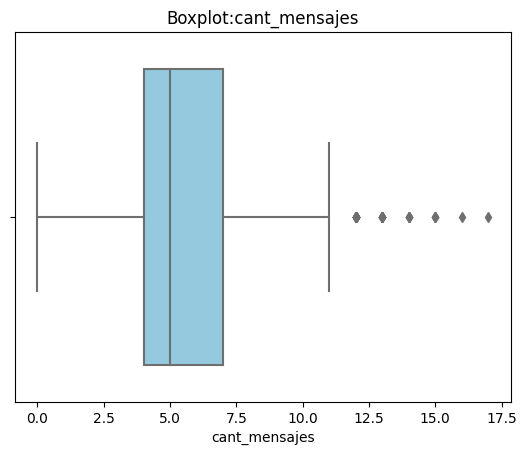

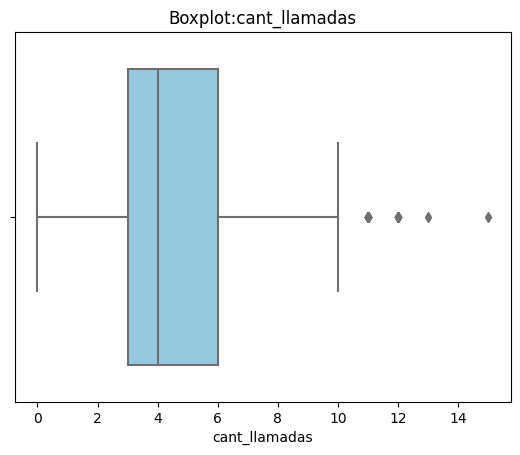

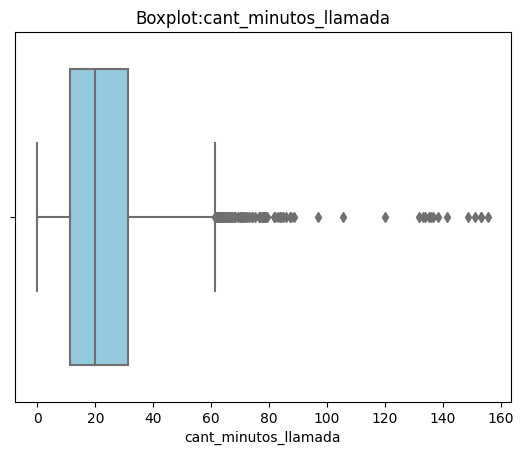

In [48]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    sns.boxplot(x=user_profile[col],color='skyblue')
    plt.title(f'Boxplot:{col}')
    plt.show()

💡Insights: 
- Age: No presenta outliers
- cant_mensajes: Presenta outliers
- cant_llamadas: Presenta outliers
- cant_minutos_llamada: Presenta outliers

In [105]:
# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes','cant_llamadas','cant_minutos_llamada']

Q1=user_profile[columnas_limites].quantile(0.25)
print('Primer cuartil:',Q1)
print()
Q3=user_profile[columnas_limites].quantile(0.75)
print('Tercer cuartil:',Q3)
print()
IQR=Q3-Q1
print ('IQR:',IQR)

Primer cuartil: cant_mensajes            4.000
cant_llamadas            3.000
cant_minutos_llamada    11.095
Name: 0.25, dtype: float64

Tercer cuartil: cant_mensajes            7.000
cant_llamadas            6.000
cant_minutos_llamada    31.185
Name: 0.75, dtype: float64

IQR: cant_mensajes            3.00
cant_llamadas            3.00
cant_minutos_llamada    20.09
dtype: float64


In [112]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no

upper=Q3+1.5*IQR
print('Limite superior:',upper)
user_profile[columnas_limites].describe()

Limite superior: cant_mensajes           11.50
cant_llamadas           10.50
cant_minutos_llamada    61.32
dtype: float64


,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,22.836934
std,2.358416,2.144238,16.590213
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.095000
50%,5.000000,4.000000,19.740000
75%,7.000000,6.000000,31.185000
max,17.000000,15.000000,155.690000


💡Insights: 
- Si bien todos tienen outliers, unos leve (mensajes y llamadas) y otro extremo (duración llamadas), son valores que mantendría, ya que son parte de la estadística, que ayuda al negocio a entender que muy pocos usuarios hacen uso de los servicios que incluye el plan y asi mejorar el contenido de cada plan. 

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [57]:
# Crear columna grupo_uso
user_profile['grupo_uso']=np.where((user_profile['cant_llamadas']<5)& (user_profile['cant_mensajes']<5),'Bajo Uso',np.where((user_profile['cant_llamadas']<10)&(user_profile['cant_mensajes']<10),'Uso medio','Alto uso'))

In [59]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_edad,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Adulto,Uso medio
1,10001,Mateo,Torres,53.0,NA,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Adulto,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Adulto,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Adulto Mayor,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Adulto Mayor,Bajo Uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [51]:
# Crear columna grupo_edad
user_profile['grupo_edad']=np.where(user_profile['age']<30,'Joven',np.where(user_profile['age']<60,'Adulto','Adulto Mayor'))

In [52]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Adulto
1,10001,Mateo,Torres,53.0,NA,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

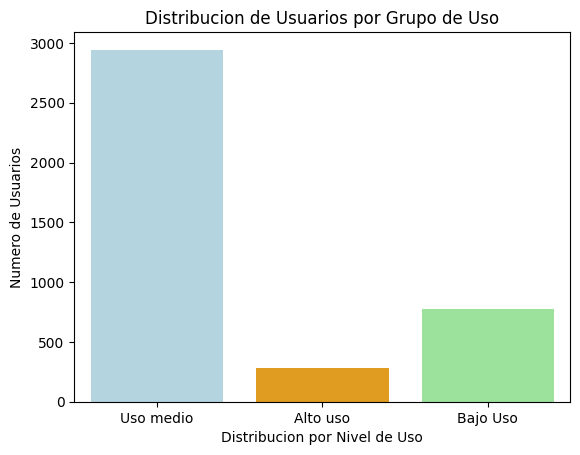

In [61]:
# Visualización de los segmentos por uso
sns.countplot(data=user_profile, x='grupo_uso', palette=['lightblue','orange','lightgreen'])
plt.title('Distribucion de Usuarios por Grupo de Uso')
plt.xlabel('Distribucion por Nivel de Uso')
plt.ylabel('Numero de Usuarios')
plt.show()

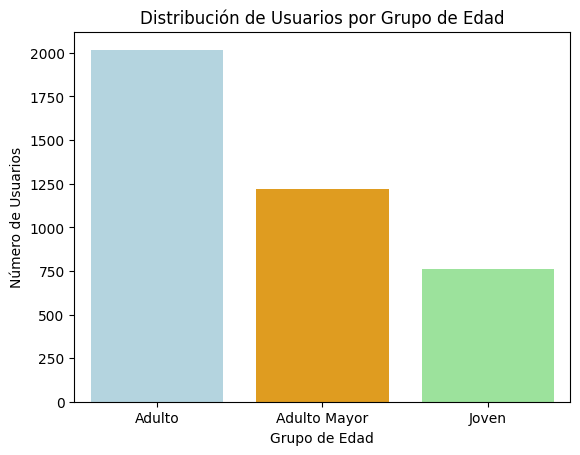

In [54]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile, x='grupo_edad', palette=['lightblue', 'orange', 'lightgreen'])
plt.title('Distribución de Usuarios por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Usuarios')
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- Dentro de los datasets trabajados se encontraron datos nulos e incoherentes, que paso a detallar:
- Columna 'City' tenia 96 filas sin identificacion (?) por lo que se reemplaza por NA, esto equivale al 11% de los datos.
- Columna 'reg_date' tenia imputadas fechas 2026 (40 filas), lo que no corresponde, ya que la data era solo hasta 2024.
- Columna 'age' tenia datos asociados a usuarios con -999, lo cual claramente no aplicada. El dato se reemplazo con la mediada.


🔍 **Segmentos por Edad**
- Los usuarios fueron agrupados en 3 categorias para asi analizar que segmento etario es el mas representativo, obteniendo siguientes datos:
- El segmento Joven entre 18 y 30 años representa al 18,75%.
- Los Adultos entre 30 y 60 años representa al 50%.
- Los Adultos Mayores sobre 60 años representan al 31,25%.


📊 **Segmentos por Nivel de Uso**
- De loss 4000 usuarios, la segmentacion por nivel de uso indico que:
- Casi 3000 usuarios (75%) tienen un nivel medio, es decir, realizan entre 5 llamadas y envian 10 mensajes.
- Solo el 6% tiene un Alto uso, es decir realiza mas de 6 llamadas y envia mas de 11 mensajes.
- En general el usuario no habla mas de 1 min en sus llamadas.

Esto sugiere que al contratar un plan el usuario sabe que dara poco uso a llamadas y mensajes, por lo que optar por un plan Premium no tiene mucho sentido, por el contrario con lo que ofrece el plan Basico es mas que suficiente para el uso que le dara. 


💡 **Recomendaciones**
- Si bien el usuario promedio de ConnectaTel dio un uso de nivel medio a servicios ofrecidos, los outliers (valores atipicos) encontrados, señalan que todos modos existe un publico que si realiza un uso de mayor flujo, sin embargo no son tan representativos como para ajustar planes a dicha data.
- El publico objetivo deben ser adultos de entre 30 y 60 años, ya que son el 50% de los usuarios.
- La contratacion del Plan Basico represento un 64,87%, por lo que se sugiere hacer ajustes en este adecuando los servicios mas a la realidad de consumo, ejemplo: No tantos mensajes, ni llamadas, pero si mas gb para internet. De este modo, los usuarios mas representativos se sientes escuchados, ya que la empresa se adecua a sus necesidades.
- Hacer enfoque publicitario en ciudades como Bogota, CDMX y Medellin, ya que represetan al 53,85% de los clientes.  
  

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`